In [95]:
import numpy as np
import pandas as pd

In [96]:
red_df=pd.read_csv('data/winequality-red.csv', sep=';')
# 데이터 가독성을 위해 나누기
red_df.head()
white_df=pd.read_csv('data/winequality-white.csv',sep=';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [97]:
red_df.info()
# 독립변수들은 실수, 와인퀄리티만 상수로 되어있음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [98]:
white_df.info()
# 레드와 달리 데이터 수 많음 차이점 확인 다른 데이터 프레임들을 합

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [99]:
red_df.insert(0,column='type', value='red')
white_df.insert(0,column='type',value='white')
# 이미 삽입되어서 오류!

In [100]:
red_df.head()
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [101]:
wine=pd.concat([red_df,white_df])
# 두가지여서 리스트형
# wine.head() #red
wine.tail() #white

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [102]:
wine.to_csv('data/wine.csv',index=False)
# 인덱스는 빼고 저장

## 데이터 탐색하기
- 기본정보 확인
- wine 데이터셋 필드 
- type                  : 와인 타입(red, white)
- fixed acidity         : 결합산 - 주로 타르타산(tartaric), 사과산(malic)으로 구성, 완인의 산도 제어
- volatile acidity      : 휘발산 - 와인의 향과 연관
- citric acid           : 구연산 - 와인의 신선함을 올려주는 역할, 산성화에 연관을 미침
- residual sugar        : 잔여 설탕 - 화인의 단맛을 올여줌
- chlorides             : 염화물 - 화인의 짠맛의 원인이며 와인의 신맛을 좌우하는 성분
- free sulfur dioxide   : 이산화 황 활성
- total sulfur dioxide  : 이산화 황 총량
- sulphates             : 황산염
- ** 황 화합물 : 황 화합물은 원하지 않는 박테리아와 효모를 죽여서 와인을 오래 보관하는 역할 
    (free sulfur dioxide, total sulfur dioxide, sulphates)
- density               : 밀도 - 바디의 높고 낮음을 표현하는 와인의 무게감
- pH                    : 산성도 - 와인의 신맛의 정도를 나타냄
- alcohol               : 알코올
- quality    

In [103]:
print(wine.head())

  type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [104]:
# column 변경하기
wine.columns=wine.columns.str.replace(' ','_')
# 공백을 _로 변경
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [106]:
print(sorted(wine['quality'].unique()))
print(wine['quality'].value_counts())
# 등급 퀄리티 정렬,  카운트

[3, 4, 5, 6, 7, 8, 9]
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [107]:
wine.groupby('type')['quality'].describe()
# 카운트, 평균, 최소, 편차, 최대

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [108]:
print(wine.groupby('type')['quality'].std())
print(wine.groupby('type')['quality'].sum())
print(wine.groupby('type')['quality'].mean())
print(wine.groupby('type')['quality'].max())
print(wine.groupby('type')['quality'].count())


type
red      0.807569
white    0.885639
Name: quality, dtype: float64
type
red       9012
white    28790
Name: quality, dtype: int64
type
red      5.636023
white    5.877909
Name: quality, dtype: float64
type
red      8
white    9
Name: quality, dtype: int64
type
red      1599
white    4898
Name: quality, dtype: int64


In [109]:
wine.groupby('type')['quality'].agg(['mean','sum','count'])

,mean,sum,count
type,,,
red,5.636023,9012,1599
white,5.877909,28790,4898


In [110]:
wine.groupby('type').agg({'quality':['count','mean'],'alcohol':['sum','std']})

quality             alcohol          
        count      mean       sum       std
type                                       
red      1599  5.636023  16666.35  1.065668
white    4898  5.877909  51498.88  1.230621

1. 와인의 type과 quality로 groupby 하여 alcohol의 평균을 구하라.
2. 와인의 quality로 groupby 하여 alcohol의 평균과 표준편차를 구하라.
3. 와인의 quality로 groupby 하여 alcohol의 [평균, 분산(var)], pH의 [증앙값(median)과 합]을 구하라.
4. 와인의 type과 quality로 groupby 하여 alcohol의 [평균과 중앙값(median)]을 구하라.

In [111]:
print(wine.groupby(['type','quality'])['alcohol'].mean())
print(wine.groupby('quality')['alcohol'].agg(['mean','std']))
print(wine.groupby('quality').agg({'alcohol':['mean','var'],'pH':['median','sum']}))
print(wine.groupby(['type','quality']).agg({'alcohol':['mean','median']}))
# 통계요약 본

type   quality
red    3           9.955000
       4          10.265094
       5           9.899706
       6          10.629519
       7          11.465913
       8          12.094444
white  3          10.345000
       4          10.152454
       5           9.808840
       6          10.575372
       7          11.367936
       8          11.636000
       9          12.180000
Name: alcohol, dtype: float64
              mean       std
quality                     
3        10.215000  1.106497
4        10.180093  0.985923
5         9.837783  0.814416
6        10.587553  1.126491
7        11.386006  1.199337
8        11.678756  1.278921
9        12.180000  1.013410
           alcohol               pH         
              mean       var median      sum
quality                                     
3        10.215000  1.224336  3.245    97.73
4        10.180093  0.972044  3.220   698.03
5         9.837783  0.663273  3.190  6867.66
6        10.587553  1.268983  3.210  9125.47
7        11.386

#- T 검정을 위해서 scipy 라이브러리 패키지 사용, 두 그룹 간 차이 비교
- 회귀분석 : statsmodel 라이브러리 패키지 사용
https://bioinformaticsandme.tistory.com/80


In [112]:
from scipy import stats
from statsmodels.formula.api import ols, glm

# 회귀 분석에 필요한 statsmodels.formula.api 패키지의 ols, glm 함수를 로드
 ols: 최소승자법 OLS: Ordinary Least Squares는 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법

In [113]:
red_wine_quality=wine.loc[wine['type']=='red','quality']
white_wine_quality=wine.loc[wine['type']=='white','quality']
# t검정을 위해서 퀄리티 추출
print(white_wine_quality[:10])
print(red_wine_quality[:10])

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: quality, dtype: int64
0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64


In [114]:
# t검정은 어떤 값에 평균의 합을 구해서 차이값을 구함 통계의 값의 차이가 의미가 있는지 판단
# t value는 0보다 작으면 기각/ 크면 의미가 있다.
# 결론은 두 와인의 퀄리티 사이 값은 차이가 의미없다~
stats.ttest_ind(red_wine_quality,white_wine_quality,equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [115]:
# 회귀분석 
# y= a1x1 + a2x2 + .... + anxn + b

# 퀄리티만 종속변수, 필드 다음은 독립변수
# 종속변수로 인해 값이 변경

Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
      residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + \
      density + pH + sulphates + alcohol' 

In [116]:
# 가중치들 중 임의 값을 추출해서 차이 값을 계속 검사해서 차이중 최소값을 검증
# 회귀식을 선형회귀분석
regression_result=ols(Rformula, data=wine).fit()


In [117]:
regression_result.summary()
# 퀄리티가 독립변수고 사용한 모델, 메소드 사용, 소요시간, fixed_acidity 와인 퀄리티의 가중치

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:59   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
# 제외되고 남은 변수들(독립변수)을 가지고 예측
sample1= wine[wine.columns.difference(['quality','type'])]
sample1.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [119]:
sample1_predict=regression_result.predict(sample1)

In [120]:
print(sample1_predict[10:20])
print(wine['quality'][10:20])

10    4.967877
11    5.690760
12    5.263028
13    5.681714
14    5.184065
15    5.219619
16    5.925258
17    5.431179
18    5.033491
19    5.517900
dtype: float64
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
Name: quality, dtype: int64


In [121]:
# 와인 퀄리티 데이터 에 독립변수 2가지 삽입
data = {
    "fixed_acidity" : [8.5, 8.1], 
    "volatile_acidity":[0.8, 0.5],
    "citric_acid":[0.3, 0.4], 
    "residual_sugar":[6.1, 5.8], 
    "chlorides":[0.055, 0.04], 
    "free_sulfur_dioxide":[30.0, 31.0], 
    "total_sulfur_dioxide":[98.0,99], 
    "density":[0.996, 0.91], 
    "pH":[3.25, 3.01], 
    "sulphates":[0.4, 0.35],
    "alcohol":[9.0, 0.88]}

In [122]:
sample2= pd.DataFrame(data,columns=sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [123]:
sample2_predict=regression_result.predict(sample2)
sample2_predict
# regression_result 훈련모델에 대한

0    4.809094
1    7.582129
dtype: float64

In [124]:
# 차트 생성
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 차트 배경 스타일 설정
sns.set_style()

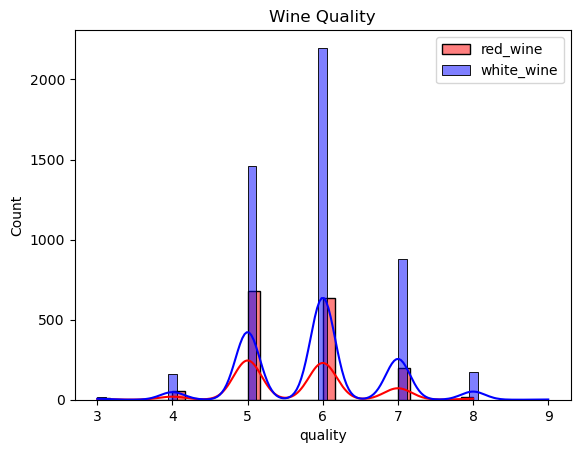

In [125]:
sns.histplot(data=red_wine_quality,kde=True, color='red', label='red_wine')
sns.histplot(data=white_wine_quality,kde=True, color='blue', label='white_wine')
plt.title('Wine Quality')
plt.legend()
# 적당한 위치에 위치
plt.show()

#부분 회귀 플롯으로 시각화하기
- 독립변수가 2개이상인 경우 부분회귀플롯을 사용하여 하나의 독립변수가 종속변수에 미치는 영향력을 시각화하여 분석할 수 있음
plot_partregress(endog,exo_i, exo_others, data=None, obs_labels=true, ret_coords=False)
- endog: 종속변수 문자열
    - exog_i: 분석 대상이 되는 독립변수 문자열
    - exog_others: 남너지 독립변수 문자열의 리스트
    - data: 모든 데이터가 있는 데이터프레임
    - obs_labels: 데이터 라벨링 여부
    - ret_coords: 잔차 데이터 반환 여부

In [126]:
import statsmodels.api as sm

In [127]:
# 부분회귀 차트를 그리기 위해서 1개의 독립변수를 제외한 나머지를 구해야함
# (1개의 독립변수가 어느정도의 영향력이 있는지 확인)
others=list(set(wine.columns).difference(set(['quality','fixed_acidity'])))
others

['total_sulfur_dioxide',
 'sulphates',
 'alcohol',
 'volatile_acidity',
 'pH',
 'chlorides',
 'density',
 'free_sulfur_dioxide',
 'citric_acid',
 'residual_sugar',
 'type']

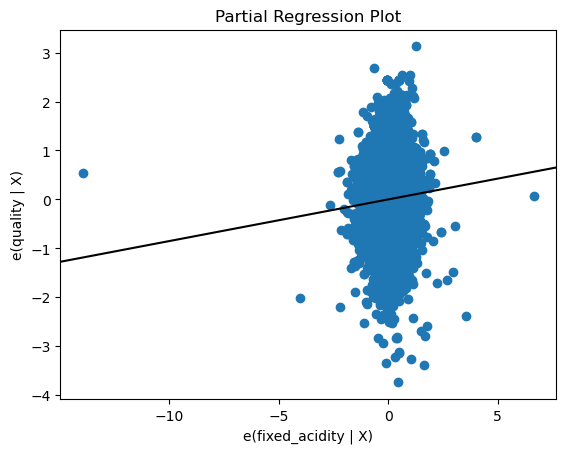

In [129]:
# 차트 그리기
# 현재보면 여러개의 독립변수 중에서 하나의 독립변수가 종속변수에 얼마나 영향력이 있는지 확인하려고 함
# 종
p, resids=sm.graphics.plot_partregress('quality', 
                                        'fixed_acidity',
                                        others,
                                        data=wine,
                                        ret_coords=True,
                                        obs_labels=False)
plt.show()

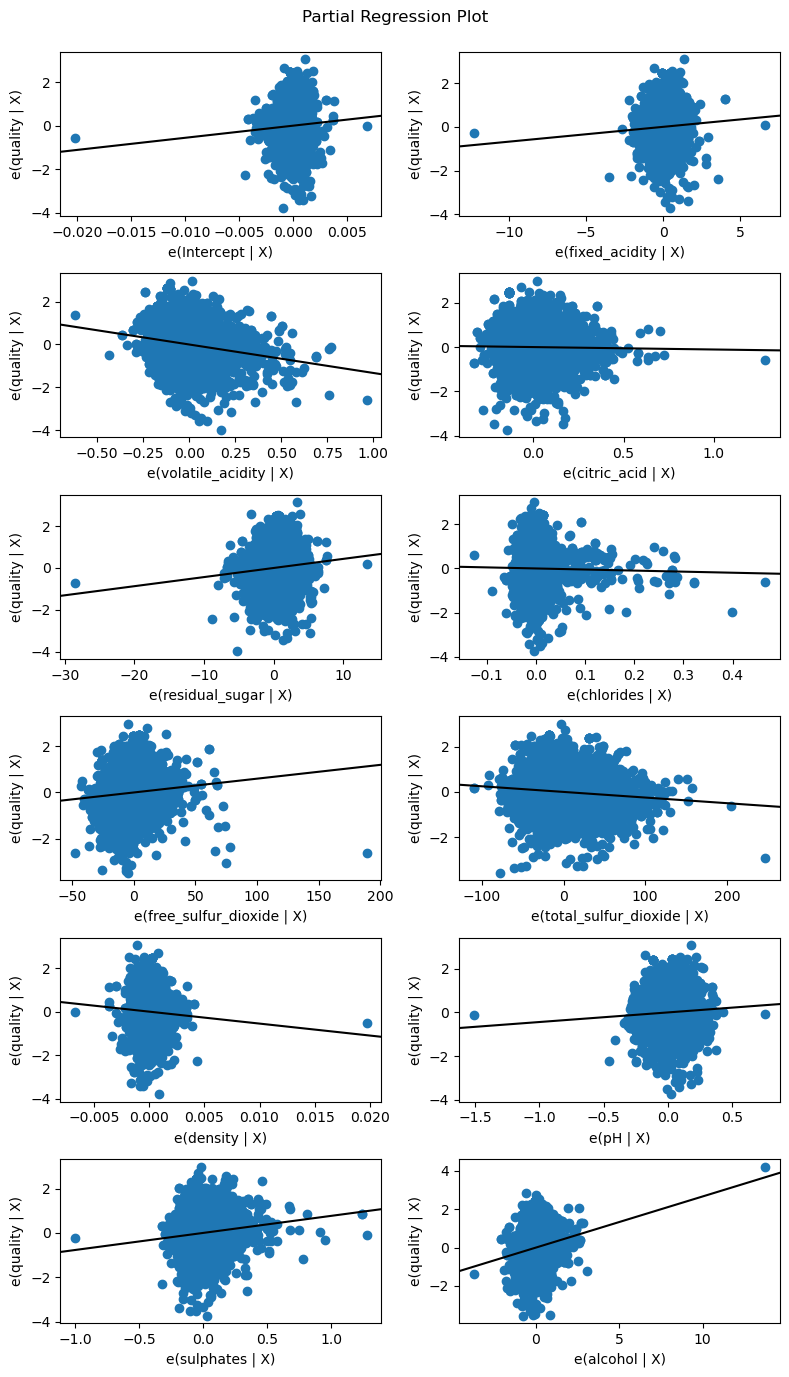

In [131]:
# 크기지정
fig=plt.figure(figsize=(8,14))
sm.graphics.plot_partregress_grid(regression_result,fig=fig)
plt.show()